In [82]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from fontTools.ttLib.woff2 import bboxFormat
from scipy import stats

plt.style.use('ggplot')
# pd.set_option('max_columns', 200) # Setting the maximum number of columns visible in the df

Read the MVP, per-game, team csv file into a data frame:

In [83]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')
years_available  = df["year"].unique().tolist()
print(years_available)

[1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


## Understanding the data

The first few rows of the dataframe:

In [84]:
df.head()

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm,MVP
0,Alan Henderson,23,Atlanta Hawks,PF,79,4,17.9,2.4,5.5,0.442,...,97.1,1.29,0.754134,0.309866,0.864718,1.156574,0.000000,1,0,0
1,Christian Laettner,26,Atlanta Hawks,C,74,71,33.7,6.0,12.3,0.487,...,97.1,1.29,1.932468,1.394397,1.441196,2.313148,0.200094,0,0,0
2,Craig Ehlo,34,Atlanta Hawks,SG,79,8,22.3,3.2,7.5,0.428,...,97.1,1.29,1.001584,0.877954,1.585316,0.231315,2.000944,4,0,0
3,Donnie Boyce,22,Atlanta Hawks,SG,8,0,5.1,1.1,2.9,0.391,...,97.1,1.29,0.353500,0.206577,0.576479,0.231315,1.000472,4,0,0
4,Grant Long,29,Atlanta Hawks,PF,82,82,36.7,4.8,10.2,0.471,...,97.1,1.29,1.543618,1.136175,1.873555,0.925259,0.800378,1,0,0


In [85]:
df.to_csv('mvp-pg-team.csv')

The rows by columns of our dataframe (shape of the data)

In [86]:
df.shape

(14294, 52)

All the columns as well as the data type contained in each column:

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14294 entries, 0 to 14293
Data columns (total 52 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   14294 non-null  object 
 1   Age      14294 non-null  int64  
 2   Team     14294 non-null  object 
 3   Pos      14294 non-null  object 
 4   G        14294 non-null  int64  
 5   GS       14294 non-null  int64  
 6   MP       14294 non-null  float64
 7   FG       14294 non-null  float64
 8   FGA      14294 non-null  float64
 9   FG%      14294 non-null  float64
 10  3P       14294 non-null  float64
 11  3PA      14294 non-null  float64
 12  3P%      14294 non-null  float64
 13  2P       14294 non-null  float64
 14  2PA      14294 non-null  float64
 15  2P%      14294 non-null  float64
 16  eFG%     14294 non-null  float64
 17  FT       14294 non-null  float64
 18  FTA      14294 non-null  float64
 19  FT%      14294 non-null  float64
 20  ORB      14294 non-null  float64
 21  DRB      142

After summarising the data, we count find missing and duplicate values

In [88]:
df.isna().sum()

Player     0
Age        0
Team       0
Pos        0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Awards     0
year       0
First      0
Pts Won    0
Pts Max    0
Share      0
WS         0
WS/48      0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
PTS_R      0
AST_R      0
STL_R      0
BLK_R      0
3P_R       0
NPos       0
NTm        0
MVP        0
dtype: int64

In [89]:
df.duplicated().sum()

np.int64(0)

Data is now all cleaned and ready for analysis

# Univariate data

- Covers which variables correlate strongest with MVP status (1 for MVP, 0 for non-MVPs)
- Examines both the full player dataset, and an additional analysis into the MVP only dataset

First, the full player dataset:

          Share
WS     0.658325
WS/48  0.640990
FTA    0.320082
FT     0.315763
PTS    0.279702


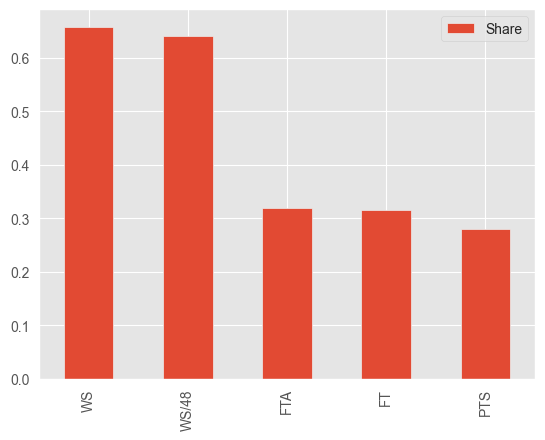

In [90]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')

predictors = [col for col in df.select_dtypes(include='number').columns.tolist() \
              if col not in ['First', 'Pts Max', 'Pts Won', 'year', 'MVP']]

df = df[predictors]

# Creates a correlation matrix, sorts values in descending order and takes the top 10
corr_1 = df.corr()[['Share']].drop('Share').sort_values('Share', ascending=False).head(5)
print(corr_1)

# Plots a bar plot of the correlation between the 'Share' column and the best predictors
corr_1.plot.bar()
plt.savefig('Graphs/Correlation bar chart (Non-MVPs).png', dpi=300, bbox_inches='tight')

Takeaways:
- Clearly WS (Win shares) and WS/48 (Win shares per 48), have the strongest correlation with MVP share in the dataset
- But the correlation matrix shows that free-throw involvement (FTA and FT) together with scoring volume is something that separates out MVPs against regular players

### MVP Exclusive dataset

- since the MVP dataset is much smaller than the original, the MVP dataset could be noisy,
  so we won't use these results

          Share
FG     0.572048
WS     0.539434
W      0.520016
PTS    0.515637
WS/48  0.507342


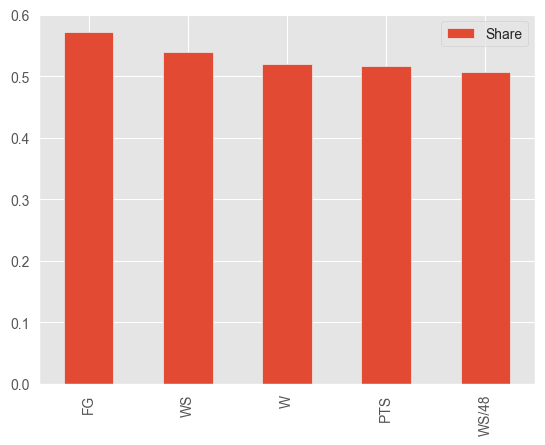

In [91]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')

predictors = [col for col in df.select_dtypes(include='number').columns.to_list()
              if col not in ['Pts Max', 'Pts Won', 'First']]

# Getting the dataframe of players who won MVP in a given season
df = df[predictors].sort_values('Share', ascending=False).groupby('year').first()

corr_2 = df.corr()[['Share']].sort_values('Share', ascending=False).drop('Share').head(5)

print(corr_2)

corr_2.plot.bar()
plt.savefig('Graphs/Correlation bar chart (MVPs).png', dpi=300, bbox_inches='tight')


In [92]:
Non_MVPs = corr_1.rename(columns={'Share': 'Non-MVPs'})
MVPs = corr_2.rename(columns={'Share': 'MVPs'})

print(Non_MVPs, '\n\n', MVPs)

       Non-MVPs
WS     0.658325
WS/48  0.640990
FTA    0.320082
FT     0.315763
PTS    0.279702 

            MVPs
FG     0.572048
WS     0.539434
W      0.520016
PTS    0.515637
WS/48  0.507342


- The results are somewhat similar, however stronger predictors lie within the full player dataset, rather than the MVP exclusive one

# Histograms of the predictors:

A subplot of histograms, showing the distribution of the data, along with a function of the distribution

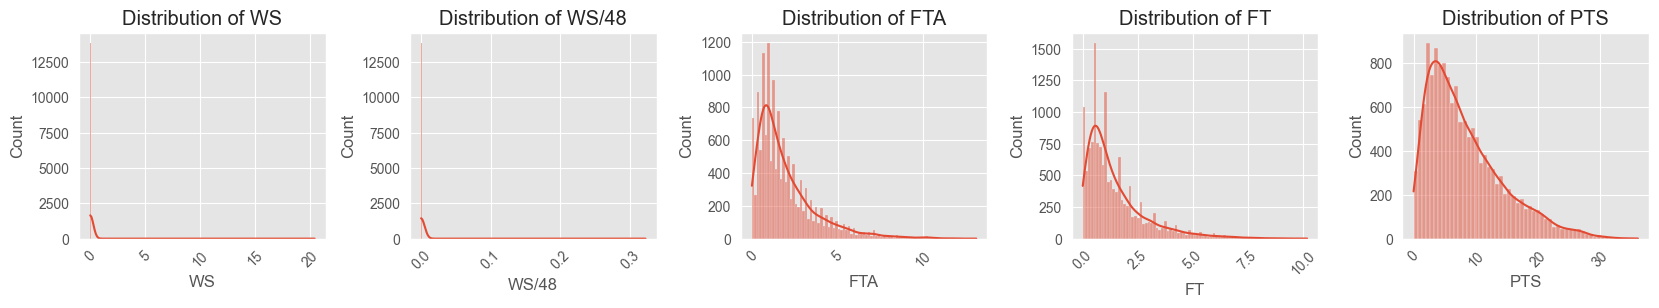

In [93]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')

bst_predictors = corr_1.index.to_list()[:5] # Getting the variables of the correlation data frame, which gives the names of the variables with the strongest correlations to MVP 'share'

df = df[bst_predictors] # The original df containing only columns that exhibited a strong relationship

plt.figure(figsize=(20, 25)) # Setting the size of the subplot

for i, column in enumerate(df.columns): # Goes through each column in the dataframe
    plt.subplot(9, 6, i+1)  # Setting the grid size
    sns.histplot(df[column], kde=True) # Using seaborn to plot a histogram for each predictor column
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=45) # Rotates the x-axis labels 45 degrees

plt.tight_layout()
plt.savefig('Graphs/Distributions.png', dpi=300, bbox_inches='tight') # Saves the plot locally

# Bivariate Analysis:

## pair-plots of share against other predictor columns (Numerical against numerical)

- This code creates a pair-plot of the 'Share' column against the strongest predictors, where MVPs are blue dots, and non-MVPs are red ones

- This is a secondary step to verify any correlation seen in the data

In [ ]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')
bst_predictors = corr_1.index.to_list()[:5]
bst_predictors.extend(['Share', 'MVP'])

df = df[bst_predictors]

plt.figure(figsize=(35, 25))
sns.pairplot(data=df, hue='MVP')

plt.tight_layout()
plt.savefig("Graphs/Pair-plot.png", dpi=300, bbox_inches='tight')

- WS (Win-shares) and WS/48 separate out MVPs against non-MVPs best, confirming the correlation pattern we saw earlier

- But this also highlights

## Numerical against categorical

- This is data exploration regarding any trends that 'Share' might have with categorical data
  
- 'NPos' and 'NTm' are columns put into the dataset, that give numerical value to a players position, and team respectively.

- Two narratives from the NBA will be tested through analysing the dataset and seeing if they hold true
    - One narrative in the NBA, is that certain positions are favoured when it comes to MVP voting.
    - Secondly, "Do players on certain teams receive more MVP votes than others"

- This analysis attempts to find if there are trends between share and, player position and player team

### Analysing trends by player position:

#### Summary statistics

- Gives basic summary statistics of our dataframe for each position
- This will outline any obvious differences there are between positions, for the MVP share values

In [76]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')

# Gets the 'share' column for each position, then calculates some summary statistics
summary = df.groupby('NPos')['Share'] \
    .agg(['mean', 'median', 'count'])

summary

,mean,median,count
NPos,,,
0,0.004903,0.0,2895
1,0.007143,0.0,2928
2,0.006642,0.0,2753
3,0.004457,0.0,2693
4,0.004164,0.0,3025


#### Box plot of distribution and summary statistics

- This code plots a box plot of 'share' for each player position

- Box plots visualise the spread of 'share' within player positions

- Meaning if one player position clearly has a higher share of MVP votes, then it will be made visible

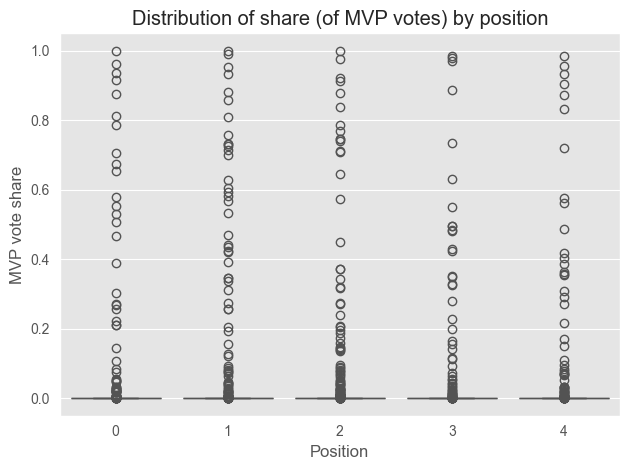

In [77]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')

# Creates a box plot with position types along the x-axis, and 'share' along the y-axis
sns.boxplot(data=df, x='NPos', y='Share')
plt.xlabel('Position')
plt.ylabel('MVP vote share')
plt.title('Distribution of share (of MVP votes) by position')
plt.tight_layout()
plt.show()

- The boxes in this plot are too small to see, as the vast majority of players' share of MVP votes in a given season is 0:
    only a select few players receive votes in a given season

- Looking at MVP exclusive data is an option here, but since the sample size is so small, it will likely be very noisy

#### One-way analysis of variation test (ANOVA)

- This tests to see if the mean of 'share' of each different position differs by a significant amount when compared to other positions
    - It tests how much of the total variance of the dataset comes from variation within each group, compared to variation between the groups


- THe ANOVA tests the null hypothesis ($ H_{0} $): 

 $ H_{0}:\mu_{1}=\mu_{2}=\mu_{3}=...=\mu_{k} $

- If the ANOVA returns a statistically significant result, then we accept the alternative hypothesis ($H_{A}$)
    - $H_{A}$ states that the mean of at least two of the groups differs significantly, although which groups  differ aren't specified

    - If $H_{A}$ is true, then this would imply that certain positions recieve more MVP votes than others



In [78]:
df = pd.read_csv('mvp-pg-team.csv')

# Getting just the 'share' values for each row, for each position dataframe
groups = [grp['Share'].values for _, grp in df.groupby('NPos')]

# Calculating the F-statistic for our null-hypothesis:

f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F={f_stat:.2f}, p={p_val:.3f}")

ANOVA F=1.56, p=0.181


Choosing $ \alpha=0.05 $, our $ p $ value exceeds that, and therefore we must accept the null hypothesis, $ H_{0} $

In [79]:
from scipy import stats

k = 5

N = df.shape[0]

F_obs = 1.56
df1 = k - 1        # number of groups - 1
df2 = N - k        # total sample size - number of groups

# p-value (right-tail)
p_val = 1 - stats.f.cdf(F_obs, df1, df2)

# critical F for a chosen alpha
alpha = 0.10
F_crit = stats.f.ppf(1 - alpha, df1, df2)

print(f"F_obs = {F_obs:.3f}, p = {p_val:.3f}")
print(f"F_crit (alpha={alpha}) = {F_crit:.3f}")
print("Decision:", "reject H0" if F_obs > F_crit else "fail to reject H0")

F_obs = 1.560, p = 0.182
F_crit (alpha=0.1) = 1.945
Decision: fail to reject H0


- Therefore, the population means, $\mu$, don't differ significantly enough to say one group is favoured in terms of recieving MVP votes

### Analysing trends by player teams:

#### Summary statistics

- Gives us a basic outline of the data

In [80]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')

df.groupby('NTm')['Share'].agg(["mean", "median", "std"])

,mean,median,std
NTm,,,
0,0.000015,0.0,0.000164
1,0.002947,0.0,0.031576
2,0.000008,0.0,0.000091
3,0.000181,0.0,0.002170
4,0.000437,0.0,0.006827
5,0.008928,0.0,0.086944
6,0.010410,0.0,0.082442
7,0.005649,0.0,0.053899
8,0.009716,0.0,0.088296


#### Box plot of distribution and summary statistics:

- This plots a box plot of MVP share by player team

- This should make visible, any trends there are between share and specific teams

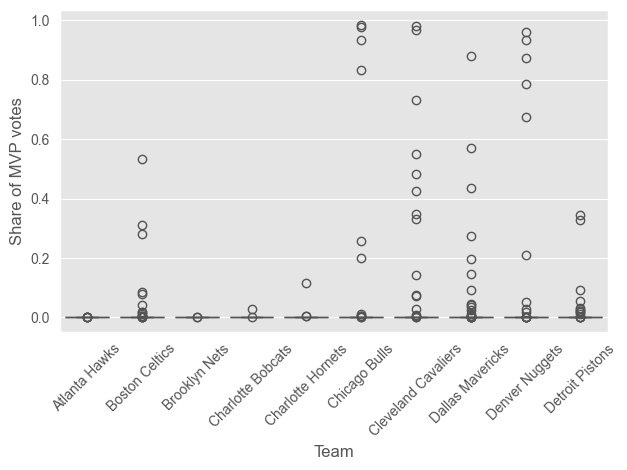

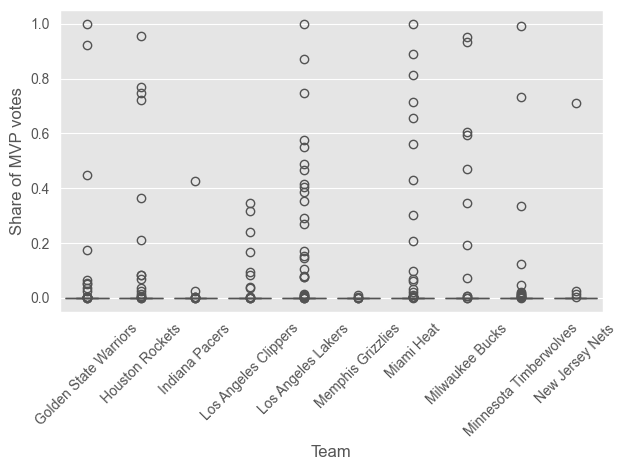

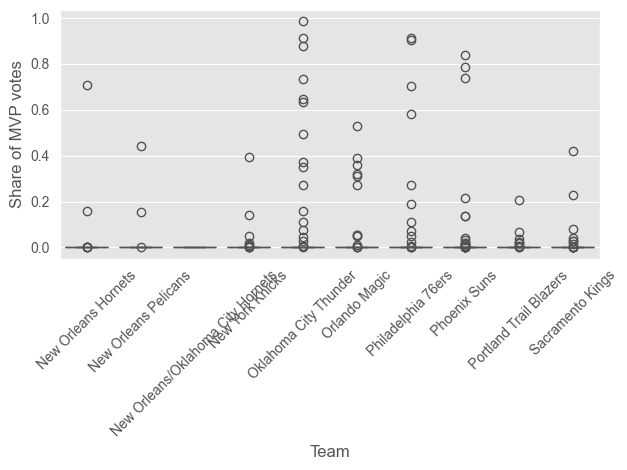

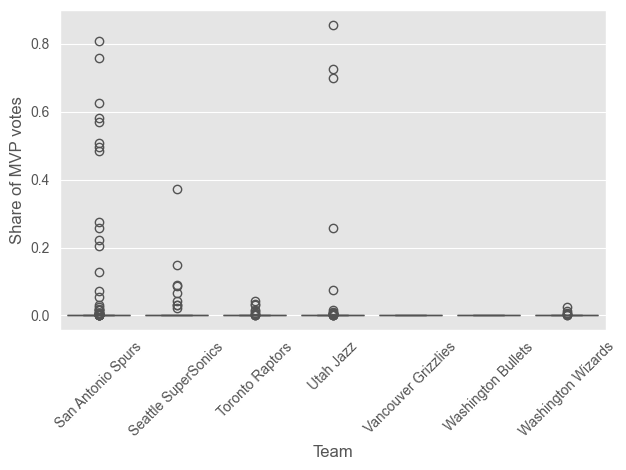

<Figure size 640x480 with 0 Axes>

In [81]:
df = pd.read_csv('../csvFiles/mvp-pg-team (clean).csv')

names = df['Team'].unique() # Getting every team name

df = df.sort_values('NTm', ascending=True).groupby('NTm') # Sorting the dataframe into alphabetical order


lead_teams = [0, 10, 20, 30, 37]

for i in range(len(lead_teams)-1):
    team_df = df.get_group(lead_teams[i]) # Getting the first dataframe, to start a group of dataframes

    # Setting the number of teams that will be in a give dataframe
    team_range = list(range(0, lead_teams[i+1] - lead_teams[i]))

    # Getting the index of the teams that will be in our dataframe
    team_index = range(lead_teams[i], lead_teams[i+1])

    # Combining all the teams (whose index falls within the team index range), into a single dataframe
    team_df = pd.concat([df.get_group(team) for team in team_index])

    # Creates a box plot of data with 'Share' along the team names along the x-axis, and MVP share along the y-axis
    sns.boxplot(data=team_df, x='NTm', y='Share')
    plt.xlabel('Team')
    plt.ylabel('Share of MVP votes')

    # Sets where each box plot should sit along the x-axis, and the label of each box plot to its corresponding team name
    plt.xticks(ticks=team_range, labels=names[list(team_index)[0]: list(team_index)[-1]+1], rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig('Graphs/Box plot of Share by team', dpi=300, bbox_inches='tight')